In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint

import sys
print("Enviornment: ", sys.executable)


plt.figure(figsize=(18,6))

pd.set_option('display.max_columns', 150)

Enviornment:  C:\Users\I568508\Anaconda3\envs\SUM\python.exe


<Figure size 1296x432 with 0 Axes>

# Data input

**Data information**
- Dataset:  Loan dataset
- File Type: .csv
- Description: Dataset is about past loan applicants and whether they ‘defaulted’ or not.
- Data date range: From 2007 to 2011
- Each row is a customer who has been granted loan. He/She may have repaid, defaulted or loan EMIs are in process.
- Number of rows: 39717

**EDA Objective**
- To understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.
- Identify risky loan applicants based on customer profile


In [2]:
metadata_df = pd.read_excel('Data_Dictionary.xlsx')
df = pd.read_csv("loan.csv", encoding='Latin-1')

C:\Users\I568508\AppData\Local\Temp\ipykernel_36640\3694139787.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan.csv", encoding='Latin-1')


In [3]:
print("Size: ",df.shape)
df.head()

Size:  (39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### Row cleaning
- Dataset doesnt have any extra header/footer/summary/blank rows.
- Remove rows not relevant to the business objective

In [7]:
print("% Loan status")
print(round(df['loan_status'].value_counts(normalize=True)*100,2), "\n")

print("Number of customers of each loan status")
df['loan_status'].value_counts()

% Loan status
Fully Paid     82.96
Charged Off    14.17
Current         2.87
Name: loan_status, dtype: float64 

Number of customers of each loan status


Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

Only ~3% customers are in 'current' loan status. We want to identify potentials driver variables behind loan default. Customers who are in 'current' as loan_status may or may not default the loan. These customers will not be relevant to the business objectve.

In [8]:
df=df[df['loan_status']!='Current']
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

### Column cleaning
- Dataset has 111 columns. All of them may not be useful for business objective.
- Delete unnecessary columns
       - This EDA is to find driving factors (or driver variables) behind loan default to identify risky loan applicants. so only customer metadata points and loan_status should be considered for EDA.
- Rename columns to more understandable names

In [9]:
#Removing repayment related columns. These will not be relevant for new loan applicant

repayment_cols= ["funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","pymnt_plan","dti","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code"]

#Removing columns with single value
same_value_col= ["application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_il_6m","open_il_12m","open_il_24m","mths_since_rcnt_il","total_bal_il","il_util","open_rv_12m","open_rv_24m","max_bal_bc","all_util","total_rev_hi_lim","inq_fi","total_cu_tl","inq_last_12m","acc_open_past_24mths","avg_cur_bal","bc_open_to_buy","bc_util","chargeoff_within_12_mths","delinq_amnt","mo_sin_old_il_acct","mo_sin_old_rev_tl_op","mo_sin_rcnt_rev_tl_op","mo_sin_rcnt_tl","mort_acc","mths_since_recent_bc","mths_since_recent_bc_dlq","mths_since_recent_inq","mths_since_recent_revol_delinq","num_accts_ever_120_pd","num_actv_bc_tl","num_actv_rev_tl","num_bc_sats","num_bc_tl","num_il_tl","num_op_rev_tl","num_rev_accts","num_rev_tl_bal_gt_0","num_sats","num_tl_120dpd_2m","num_tl_30dpd","num_tl_90g_dpd_24m","num_tl_op_past_12m","pct_tl_nvr_dlq","percent_bc_gt_75","tax_liens","tot_hi_cred_lim","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit"]

#Metadata columns which seem to add no value or too much information to process
#loan_id and member_id are not dupliated. so they can be used as row identifier however, there is already index columns. 
irrelevant_metadata_cols=["url","desc","title","inq_last_6mths", 'member_id','id', 'emp_title']

drop_cols= repayment_cols+same_value_col+irrelevant_metadata_cols

df.drop(drop_cols, axis=1, inplace=True)
print(df.shape)
df.head()

(38577, 20)


,loan_amnt,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,0,Jan-85,NaN,NaN,3,0,13648,83.70%,9,0.0
1,2500,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,0,Apr-99,NaN,NaN,3,0,1687,9.40%,4,0.0
2,2400,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,0,Nov-01,NaN,NaN,2,0,2956,98.50%,10,0.0
3,10000,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,0,Feb-96,35.0,NaN,10,0,5598,21%,37,0.0
5,5000,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,0,Nov-04,NaN,NaN,9,0,7963,28.30%,12,0.0


In [10]:
#Rename columns

rename_cols_dict = {'id': 'loan_id',
        'issue_d': 'loan_issue_dt',
        'emp_length': 'employment_length',
        'verification_status': 'salary_verified',
        'purpose': 'loan_purpose',
        'delinq_2yrs': 'no_of_late_paymnts',
        'mths_since_last_delinq': 'mths_since_last_late_paymnt',
        'purpose': 'loan_purpose',
        'delinq_2yrs': 'no_of_late_paymnt',
        'pub_rec': 'no_of_pub_records',
        'mths_since_last_record': 'mths_since_last_pub_record',
        'open_acc': 'no_of_open_credit_lines',
        'revol_bal': 'credit_revol_bal',
        'revol_util': 'percent_cred_use',
        'total_acc': 'no_of_total_credit_lines',
        'pub_rec_bankruptcies': 'no_of_pub_record_bankruptcies',
        'addr_state':'address_state'
       }

df.rename(columns=rename_cols_dict,inplace=True)

In [11]:
print(df.shape)
df.head()

(38577, 20)


,loan_amnt,employment_length,home_ownership,annual_inc,salary_verified,loan_issue_dt,loan_status,loan_purpose,zip_code,address_state,no_of_late_paymnt,earliest_cr_line,mths_since_last_late_paymnt,mths_since_last_pub_record,no_of_open_credit_lines,no_of_pub_records,credit_revol_bal,percent_cred_use,no_of_total_credit_lines,no_of_pub_record_bankruptcies
0,5000,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,0,Jan-85,NaN,NaN,3,0,13648,83.70%,9,0.0
1,2500,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,0,Apr-99,NaN,NaN,3,0,1687,9.40%,4,0.0
2,2400,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,0,Nov-01,NaN,NaN,2,0,2956,98.50%,10,0.0
3,10000,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,0,Feb-96,35.0,NaN,10,0,5598,21%,37,0.0
5,5000,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,0,Nov-04,NaN,NaN,9,0,7963,28.30%,12,0.0


### Missing value
-  Check which columns have missing values

In [12]:
#Checking columns for missing values
df.isnull().sum()

loan_amnt                            0
employment_length                 1033
home_ownership                       0
annual_inc                           0
salary_verified                      0
loan_issue_dt                        0
loan_status                          0
loan_purpose                         0
zip_code                             0
address_state                        0
no_of_late_paymnt                    0
earliest_cr_line                     0
mths_since_last_late_paymnt      24905
mths_since_last_pub_record       35837
no_of_open_credit_lines              0
no_of_pub_records                    0
credit_revol_bal                     0
percent_cred_use                    50
no_of_total_credit_lines             0
no_of_pub_record_bankruptcies      697
dtype: int64

**Observations:**

- Employment length has 1033 missing values. Though this column is applicable to all, NaN are small portion, so we can ignore.
- no_of_pub_record_bankruptcies are not available for certain rows. Though this column is applicable to all, NaN are small portion, so we can ignore.
- 'mths_since_last_late_paymnt' and 'mths_since_last_pub_record' would be applicable to only small portion of actual dataset thus remaining are NA. 
- Imputing it will exxagerate the data distribution. Missing values for this should be kept as it is.

### Standardize values

- remove outliers
- standardize the data columns wherever necessary
- Remove extra suffix or prefix

In [13]:
df.describe()

,loan_amnt,annual_inc,no_of_late_paymnt,mths_since_last_late_paymnt,mths_since_last_pub_record,no_of_open_credit_lines,no_of_pub_records,credit_revol_bal,no_of_total_credit_lines,no_of_pub_record_bankruptcies
count,38577.000000,3.857700e+04,38577.000000,13672.000000,2740.000000,38577.000000,38577.000000,38577.000000,38577.000000,37880.000000
mean,11047.025430,6.877797e+04,0.146668,35.882534,69.260949,9.275423,0.055422,13289.489826,22.052648,0.043479
std,7348.441646,6.421868e+04,0.492271,22.028093,43.987761,4.401588,0.237804,15866.492241,11.425861,0.204583
min,500.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5300.000000,4.000000e+04,0.000000,18.000000,19.750000,6.000000,0.000000,3650.000000,13.000000,0.000000
50%,9600.000000,5.886800e+04,0.000000,34.000000,90.000000,9.000000,0.000000,8762.000000,20.000000,0.000000
75%,15000.000000,8.200000e+04,0.000000,52.000000,104.000000,12.000000,0.000000,16912.000000,29.000000,0.000000
max,35000.000000,6.000000e+06,11.000000,120.000000,129.000000,44.000000,4.000000,149588.000000,90.000000,2.000000


C:\Users\I568508\Anaconda3\envs\SUM\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

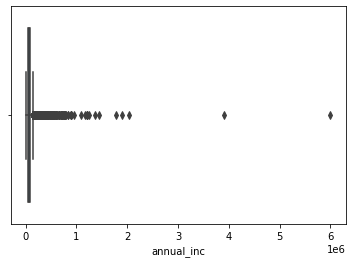

In [14]:
sns.boxplot(df['annual_inc'])

- Annual income has some outliers

In [15]:
# Removing rows with very high annual_inc top 2%. They have income 
df= df[df['annual_inc']<df['annual_inc'].quantile(q=0.98)]

C:\Users\I568508\Anaconda3\envs\SUM\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='credit_revol_bal'>

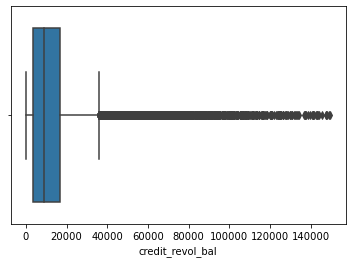

In [16]:
sns.boxplot(df['credit_revol_bal'])

In [17]:
# Removing rows with very high annual_inc top 2%. They have income 
df= df[df['credit_revol_bal']<df['credit_revol_bal'].quantile(q=0.98)]

In [18]:
def find_year(x):
    x= int(x[-2:])
    if x<20:
        return 2000+x
    else:
        return 1900+x


   
df['earliest_cr_line_year'] = df['earliest_cr_line'].apply(find_year)

df.drop(columns=['earliest_cr_line'], inplace=True)


   
df['loan_issue_dt_year'] = df['loan_issue_dt'].apply(find_year)

df.drop(columns=['loan_issue_dt'], inplace=True)

In [19]:
#Standardizing percent_cred_use columns

df['percent_cred_use']=round(df['percent_cred_use'].str[:-1].astype(float),3)

### Data quality issue

In [20]:
df[df['mths_since_last_pub_record'].notna()]['no_of_pub_records'].value_counts()

1    1988
0     636
2      47
3       7
4       2
Name: no_of_pub_records, dtype: int64

If mths_since_last_pub_record is not null i.e. person has surely commited crime, no_of_public_records cannot be 0. However, it seems there are 636 entries with 0 value here. This is a mistake. People with 0 public records cannot have any corresponding value in 'mths_since_last_pub_record' Lets analyze this further.

In [21]:
df['mths_since_last_pub_record'].value_counts()

0.0      636
104.0     60
89.0      57
113.0     56
111.0     56
        ... 
14.0       1
46.0       1
83.0       1
19.0       1
5.0        1
Name: mths_since_last_pub_record, Length: 111, dtype: int64

There are exactly 636 entries with 0 months since last public record. that means for people with no public record, instead of putting 'NA' there is value 0. This needs to be corrected

In [22]:
df['mths_since_last_pub_record'].replace(0.0, np.nan, inplace=True)
df['mths_since_last_pub_record']

0       NaN
1       NaN
2       NaN
3       NaN
5       NaN
         ..
39710   NaN
39712   NaN
39713   NaN
39714   NaN
39716   NaN
Name: mths_since_last_pub_record, Length: 37046, dtype: float64

### Update to correct data type

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37046 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   loan_amnt                      37046 non-null  int64  
 1   employment_length              36040 non-null  object 
 2   home_ownership                 37046 non-null  object 
 3   annual_inc                     37046 non-null  float64
 4   salary_verified                37046 non-null  object 
 5   loan_status                    37046 non-null  object 
 6   loan_purpose                   37046 non-null  object 
 7   zip_code                       37046 non-null  object 
 8   address_state                  37046 non-null  object 
 9   no_of_late_paymnt              37046 non-null  int64  
 10  mths_since_last_late_paymnt    13167 non-null  float64
 11  mths_since_last_pub_record     2044 non-null   float64
 12  no_of_open_credit_lines        37046 non-null 

- Checked for all data types, all are already modified to suitable type and are found consistent as expected
-  There are no erratic values present in the object type datatype columns

### Filtering data

In [24]:
df.duplicated().sum()

0

- no exactly duplicate rows are present.
- Complete data and all columns need to be considered as filtering is already done based on necessary conditions.

# Univariate analysis and segmented univariate analysis

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37046 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   loan_amnt                      37046 non-null  int64  
 1   employment_length              36040 non-null  object 
 2   home_ownership                 37046 non-null  object 
 3   annual_inc                     37046 non-null  float64
 4   salary_verified                37046 non-null  object 
 5   loan_status                    37046 non-null  object 
 6   loan_purpose                   37046 non-null  object 
 7   zip_code                       37046 non-null  object 
 8   address_state                  37046 non-null  object 
 9   no_of_late_paymnt              37046 non-null  int64  
 10  mths_since_last_late_paymnt    13167 non-null  float64
 11  mths_since_last_pub_record     2044 non-null   float64
 12  no_of_open_credit_lines        37046 non-null 

**Loan status**

In [26]:
print(df['loan_status'].value_counts(), "\n")
print(df['loan_status'].value_counts(normalize=True))

Fully Paid     31596
Charged Off     5450
Name: loan_status, dtype: int64 

Fully Paid     0.852886
Charged Off    0.147114
Name: loan_status, dtype: float64


Almost 80% customers (31.5k) pay loan and 14% (5450) default.

**Loan amount**

In [27]:
df['loan_amnt'].describe()

count    37046.000000
mean     10797.289856
std       7150.805515
min        500.000000
25%       5000.000000
50%       9500.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

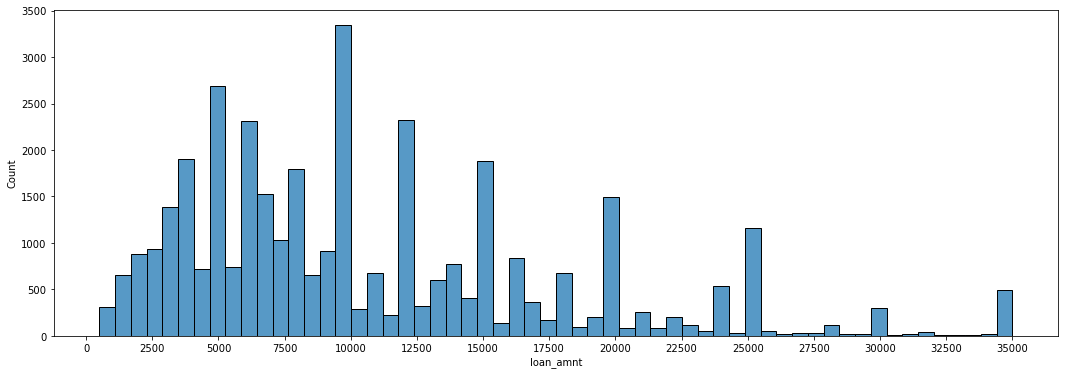

In [28]:
plt.figure(figsize=(18,6))
plt.xticks(ticks=[i for i in range(0, 40000, 2500)])
sns.histplot(df['loan_amnt'])

<AxesSubplot:xlabel='loan_amnt', ylabel='loan_status'>

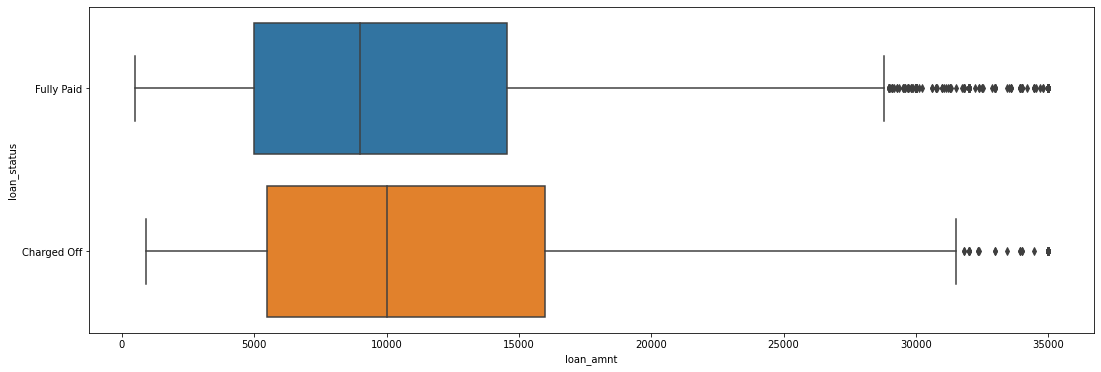

In [29]:
plt.figure(figsize=(18,6))
sns.boxplot(x=df['loan_amnt'], y =df['loan_status'])

Loan amount ranges from 500 to 35000. 75% loans are below 15k. There are spikes at 5k, 10k, 12.5k and 15k. People seem to prefer loans of round figures.

People who default have slightly more loan amount borrowing pattern than people who dont.

**Employment length**

<AxesSubplot:>

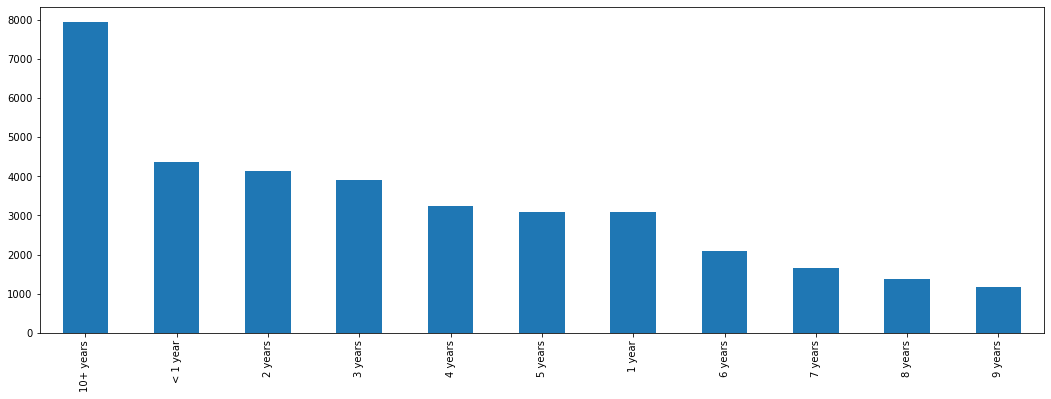

In [30]:
plt.figure(figsize=(18,6))
df['employment_length'].value_counts().plot(kind='bar')

C:\Users\I568508\Anaconda3\envs\SUM\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='employment_length', ylabel='count'>

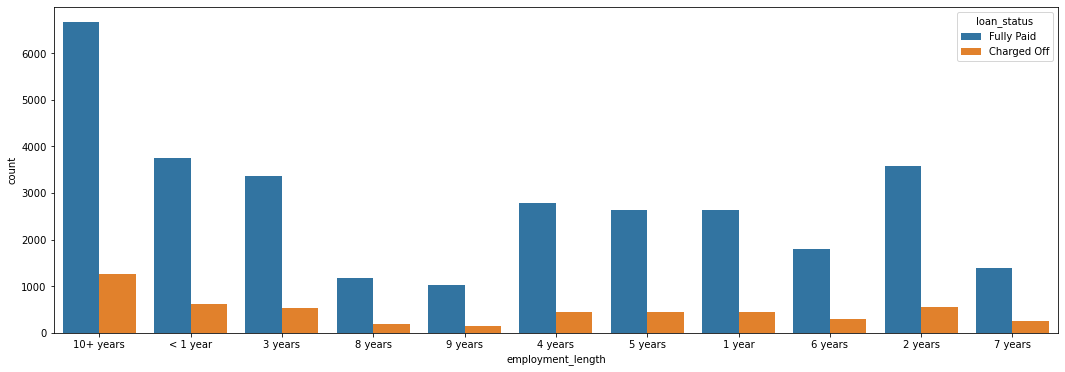

In [31]:
plt.figure(figsize=(18,6))
sns.countplot(df['employment_length'], hue=df['loan_status'])

**Home ownership**

C:\Users\I568508\Anaconda3\envs\SUM\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='home_ownership', ylabel='count'>

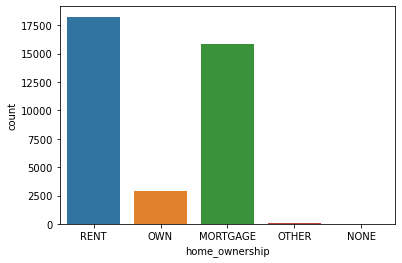

In [32]:
sns.countplot(df['home_ownership'])

C:\Users\I568508\Anaconda3\envs\SUM\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='home_ownership', ylabel='count'>

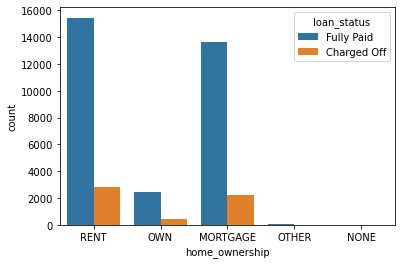

In [33]:
sns.countplot(df['home_ownership'], hue=df['loan_status'])

**Annual income**

C:\Users\I568508\Anaconda3\envs\SUM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

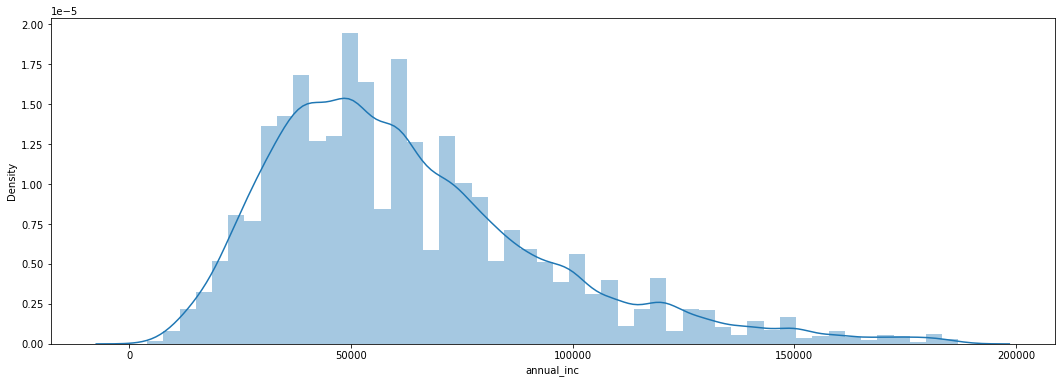

In [34]:
plt.figure(figsize=(18,6))
sns.distplot(df['annual_inc'])

<AxesSubplot:xlabel='annual_inc', ylabel='loan_status'>

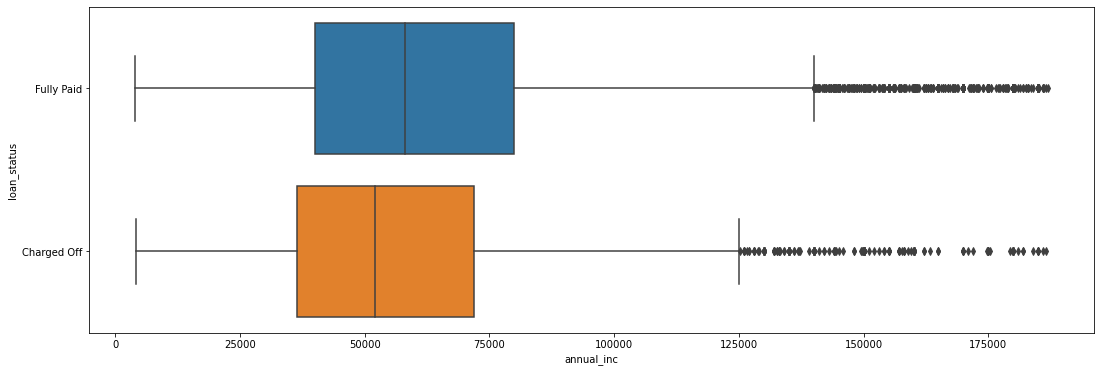

In [35]:
plt.figure(figsize=(18,6))
sns.boxplot(x=df['annual_inc'], y =df['loan_status'])

People who charge off seem to have less annual income than people who have are not charged off. People with income above 90k seem to repaying the loans.

**Salary verified**

C:\Users\I568508\Anaconda3\envs\SUM\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary_verified', ylabel='count'>

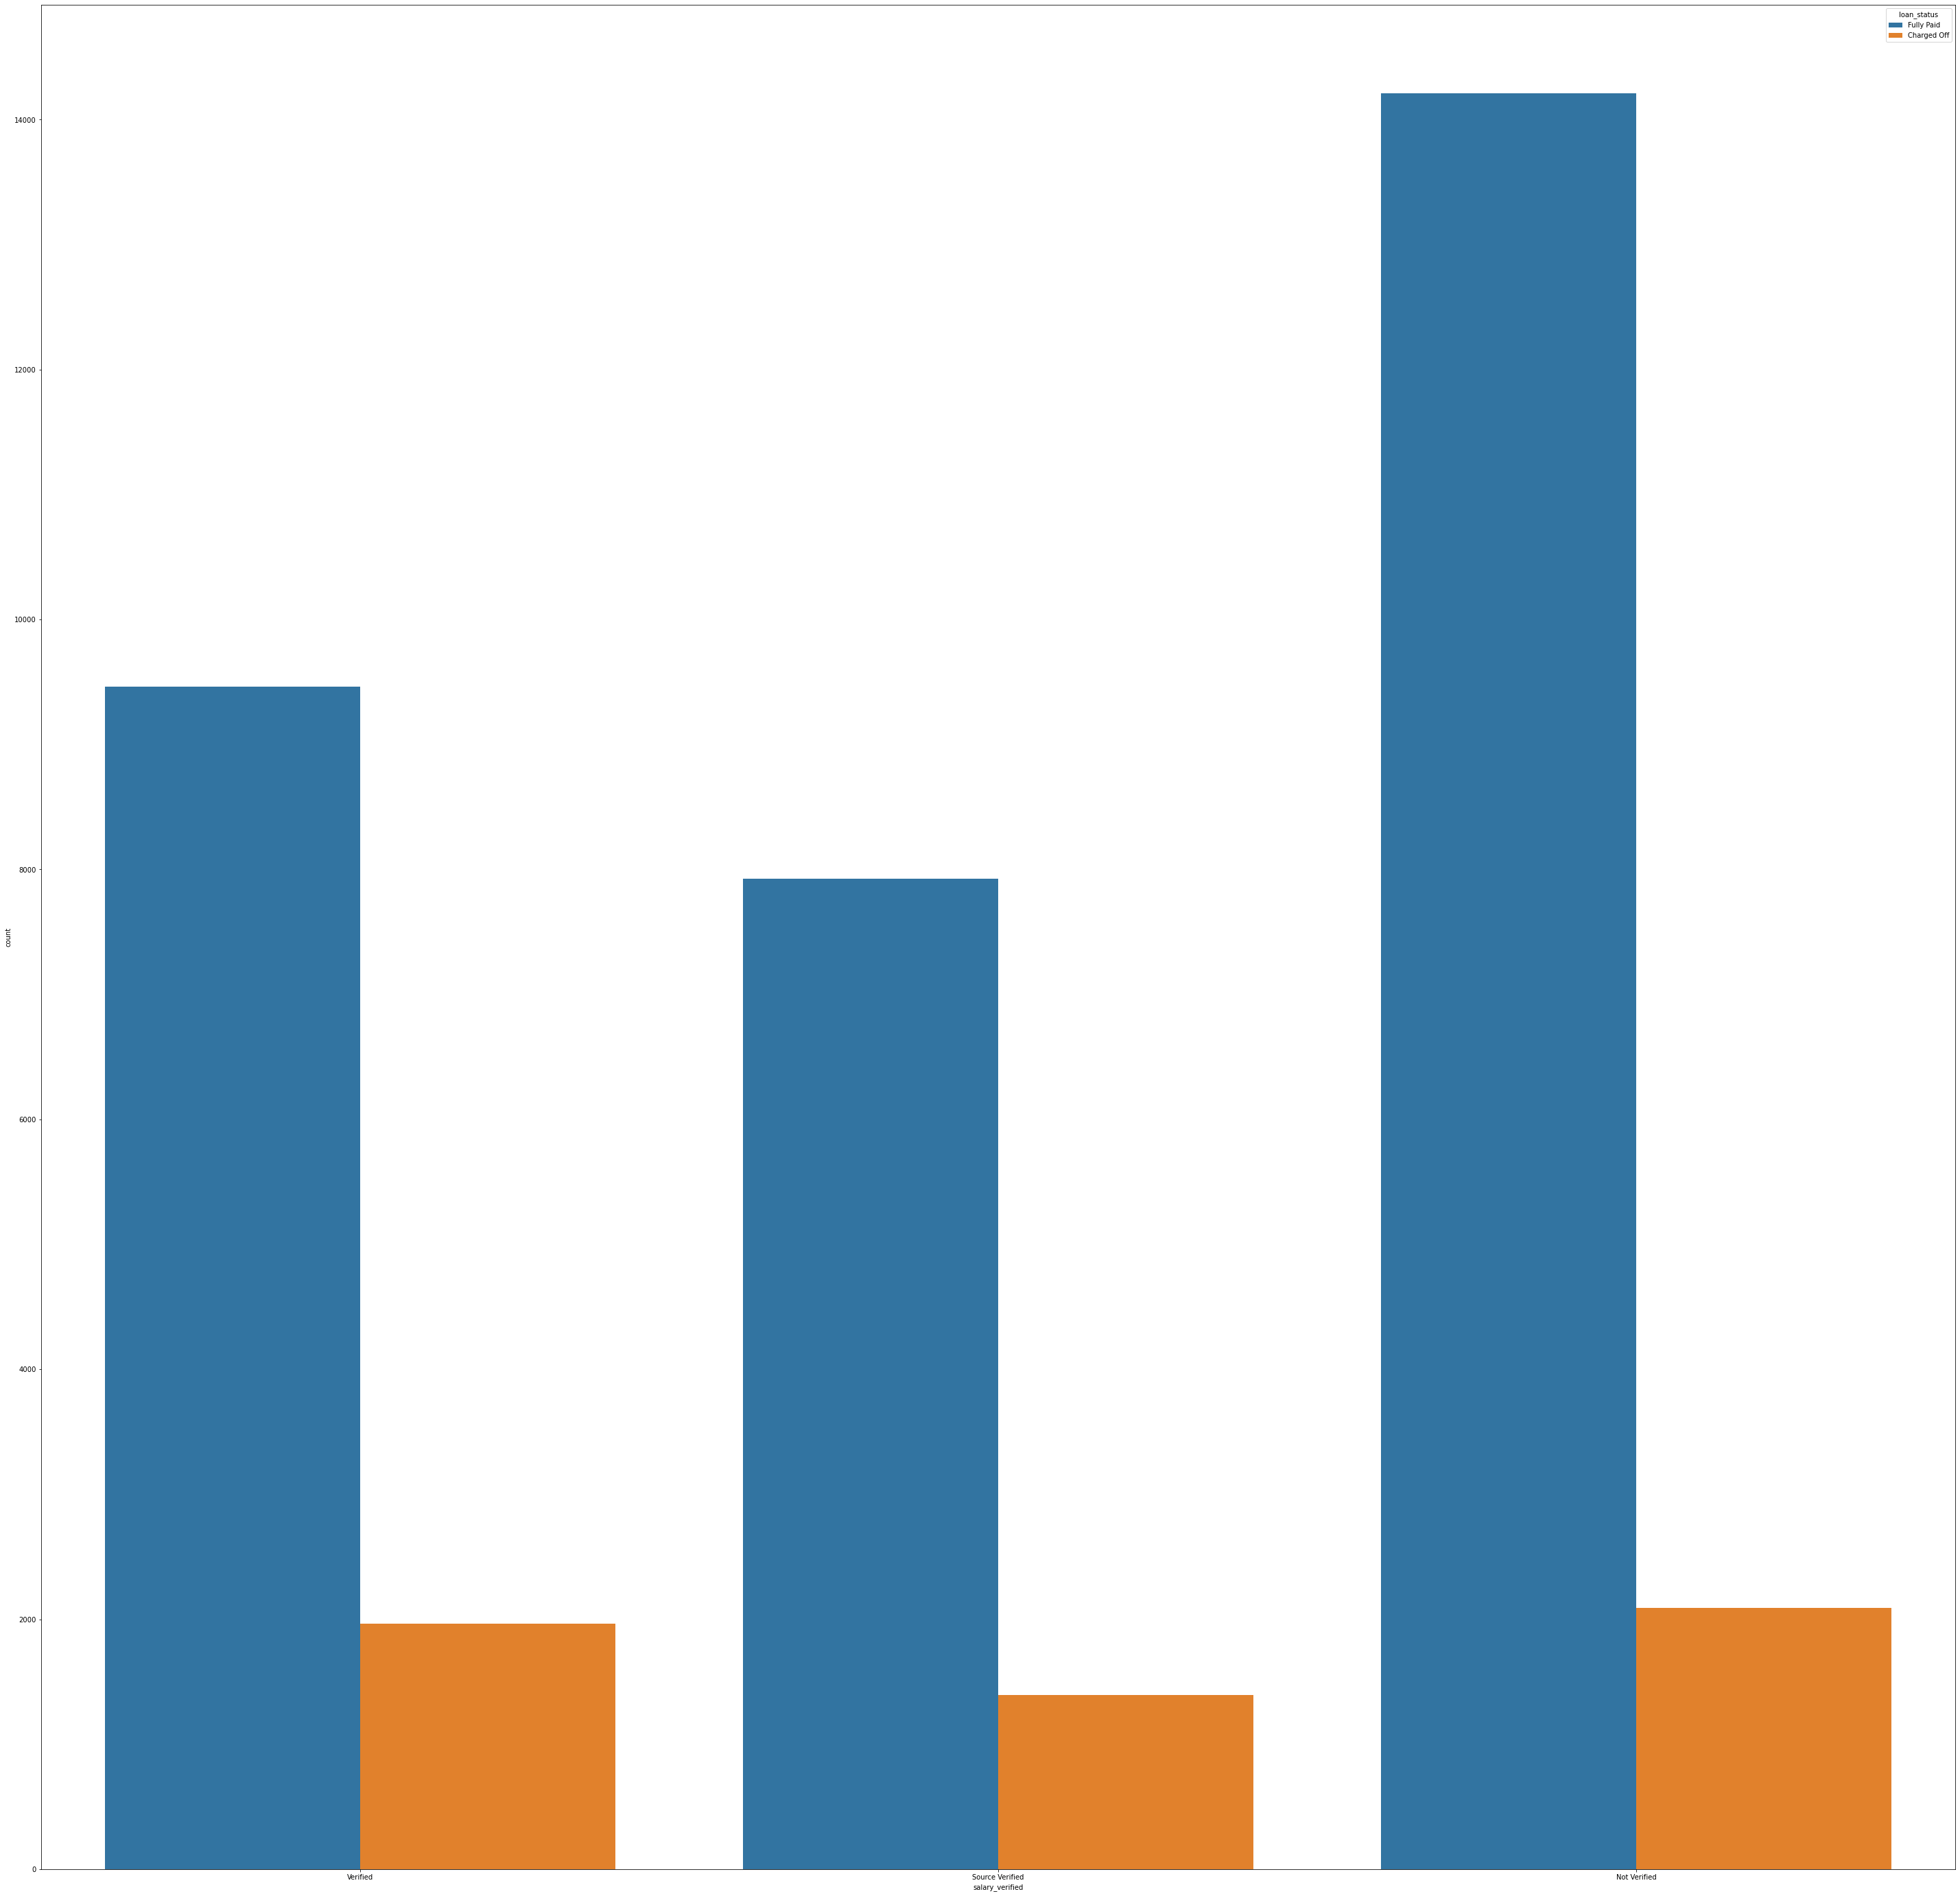

In [36]:
plt.figure(figsize=(50,50))
plt.savefig('temp.jpeg')
sns.countplot(df['salary_verified'], hue=df['loan_status'])

# Univariate analysis revised

In [56]:
df

,loan_amnt,employment_length,home_ownership,annual_inc,salary_verified,loan_status,loan_purpose,zip_code,address_state,no_of_late_paymnt,mths_since_last_late_paymnt,mths_since_last_pub_record,no_of_open_credit_lines,no_of_pub_records,credit_revol_bal,percent_cred_use,no_of_total_credit_lines,no_of_pub_record_bankruptcies,earliest_cr_line_year,loan_issue_dt_year
0,5000,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,860xx,AZ,0,NaN,NaN,3,0,13648,83.7,9,0.0,1985,2011
1,2500,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,309xx,GA,0,NaN,NaN,3,0,1687,9.4,4,0.0,1999,2011
2,2400,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,606xx,IL,0,NaN,NaN,2,0,2956,98.5,10,0.0,2001,2011
3,10000,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,917xx,CA,0,35.0,NaN,10,0,5598,21.0,37,0.0,1996,2011
5,5000,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,852xx,AZ,0,NaN,NaN,9,0,7963,28.3,12,0.0,2004,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39710,5000,1 year,OWN,85000.0,Not Verified,Fully Paid,credit_card,537xx,WI,0,0.0,NaN,7,0,216,0.6,19,NaN,1997,2007
39712,2500,4 years,MORTGAGE,110000.0,Not Verified,Fully Paid,home_improvement,802xx,CO,0,0.0,NaN,13,0,7274,13.1,40,NaN,1990,2007
39713,8500,3 years,RENT,18000.0,Not Verified,Fully Paid,credit_card,274xx,NC,1,5.0,NaN,6,0,8847,26.9,9,NaN,1986,2007
39714,5000,< 1 year,MORTGAGE,100000.0,Not Verified,Fully Paid,debt_consolidation,017xx,MA,0,0.0,NaN,11,0,9698,19.4,20,NaN,1998,2007


In [57]:
num_var= df.dtypes[(df.dtypes == 'int64' )|  (df.dtypes == 'float64')].index
cat_var = df.dtypes[df.dtypes == 'object'].index

print('Numeric variables:   ', num_var, "\n\n")
print('Categorical variables:   ', cat_var)


Numeric variables:    Index(['loan_amnt', 'annual_inc', 'no_of_late_paymnt',
       'mths_since_last_late_paymnt', 'mths_since_last_pub_record',
       'no_of_open_credit_lines', 'no_of_pub_records', 'credit_revol_bal',
       'percent_cred_use', 'no_of_total_credit_lines',
       'no_of_pub_record_bankruptcies', 'earliest_cr_line_year',
       'loan_issue_dt_year'],
      dtype='object') 


Categorical variables:    Index(['employment_length', 'home_ownership', 'salary_verified', 'loan_status',
       'loan_purpose', 'zip_code', 'address_state'],
      dtype='object')


In [58]:
df.describe()

,loan_amnt,annual_inc,no_of_late_paymnt,mths_since_last_late_paymnt,mths_since_last_pub_record,no_of_open_credit_lines,no_of_pub_records,credit_revol_bal,percent_cred_use,no_of_total_credit_lines,no_of_pub_record_bankruptcies,earliest_cr_line_year,loan_issue_dt_year
count,37046.000000,37046.000000,37046.000000,13167.000000,2044.000000,37046.000000,37046.000000,37046.00000,36997.000000,37046.000000,36384.000000,37046.000000,37046.000000
mean,10797.289856,62813.188989,0.146224,36.023316,91.690802,9.170464,0.056983,11420.54157,48.499033,21.706527,0.044772,1996.801598,2010.311748
std,7150.805515,31356.992888,0.492758,22.020970,22.522720,4.353891,0.240949,10746.33966,28.317099,11.278457,0.207470,6.750302,0.880414
min,500.000000,4000.000000,0.000000,0.000000,5.000000,2.000000,0.000000,0.00000,0.000000,2.000000,0.000000,1946.000000,2007.000000
25%,5000.000000,40000.000000,0.000000,18.000000,86.000000,6.000000,0.000000,3515.50000,25.000000,13.000000,0.000000,1994.000000,2010.000000
50%,9500.000000,56700.000000,0.000000,34.000000,97.000000,8.000000,0.000000,8412.50000,48.800000,20.000000,0.000000,1998.000000,2011.000000
75%,15000.000000,79353.000000,0.000000,52.000000,108.000000,12.000000,0.000000,15915.75000,72.000000,28.000000,0.000000,2001.000000,2011.000000
max,35000.000000,186996.000000,11.000000,120.000000,129.000000,42.000000,4.000000,59435.00000,99.900000,90.000000,2.000000,2008.000000,2011.000000


## Numerical Feature univariate analysis

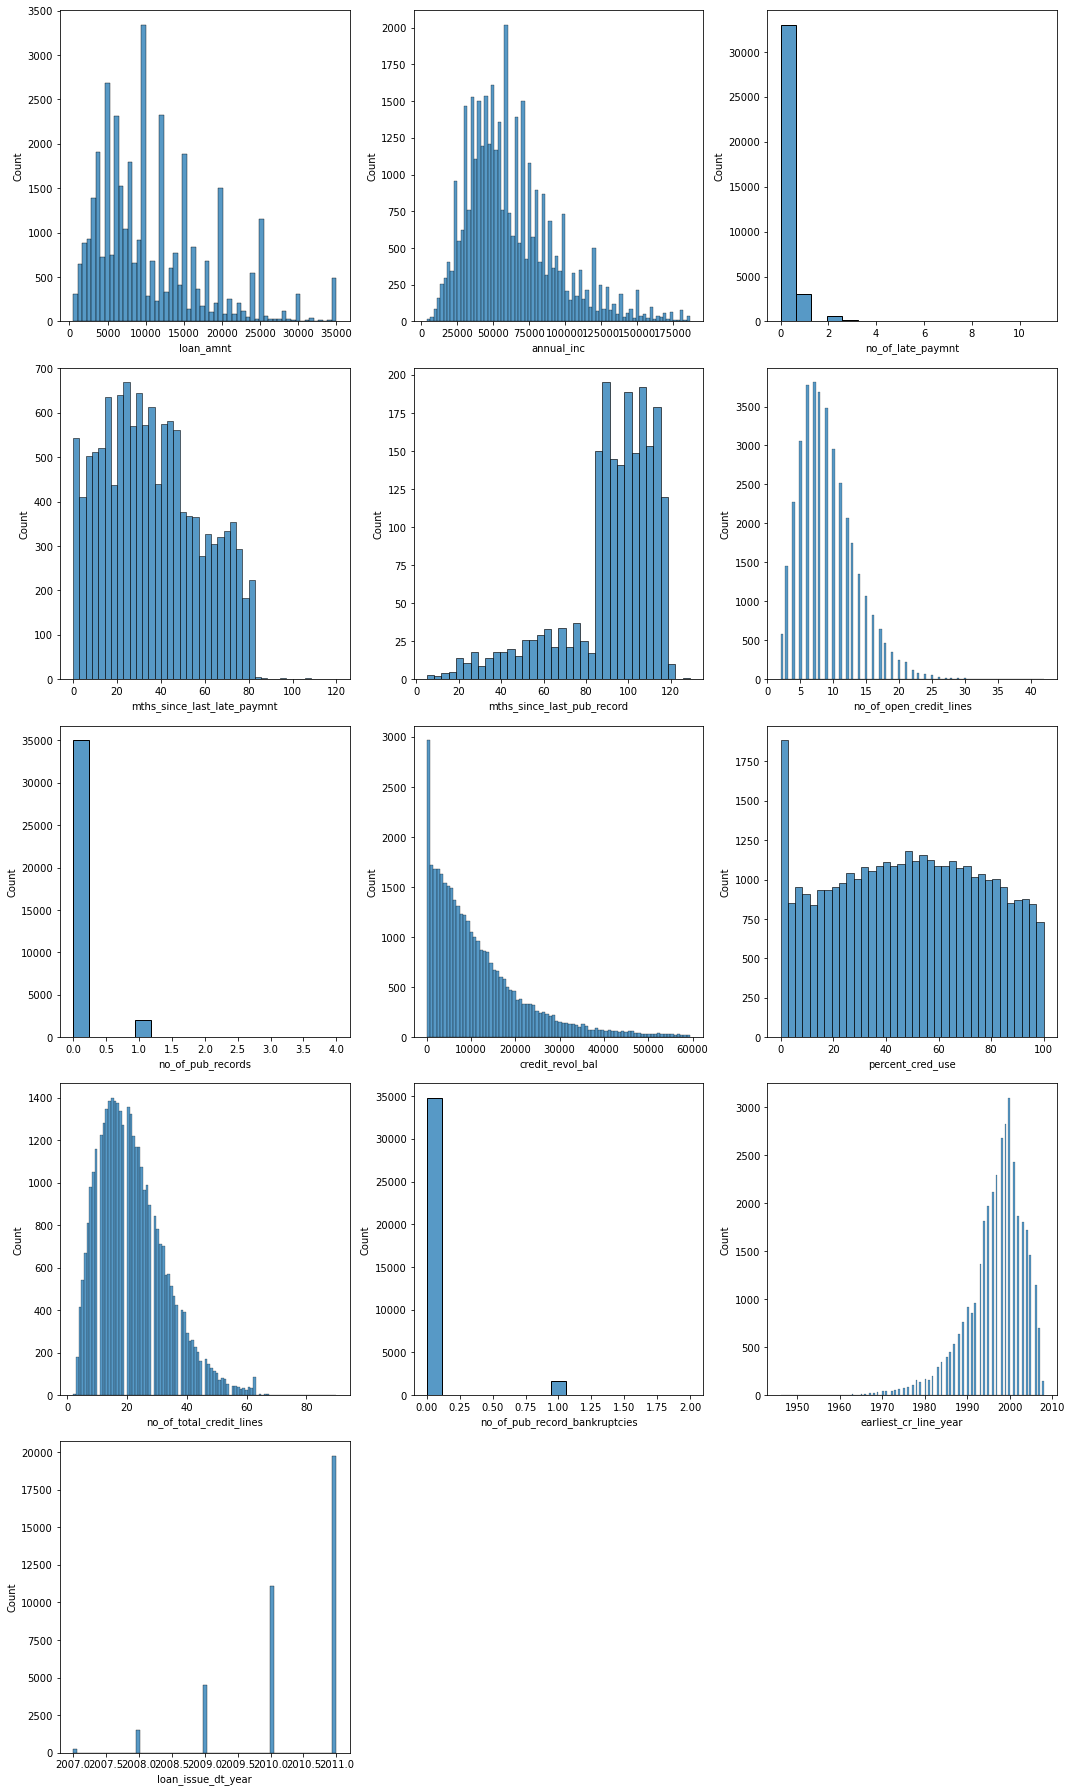

In [59]:
cols = 3
rows = 5
num_cols = df.select_dtypes(exclude='object').columns
fig = plt.figure(figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = df[col], ax = ax)
    
fig.tight_layout()  
plt.show()

**Observations and conclusions:**
- A lot of people seem to have 0 months since last public record and since last late payment. This seems to be data issue. As most of the people pay on time, these columns will not be applicable to these people. so they are given 0. Which is inaccurate.
- Number of loans issued has increased significantly over the years from 2007 to 2011
- Loan amount has spikes at round figures like 5k, 10k, 15k, 20k. People prefer round figure as loan amount.
- Credit_revolv_bal and percent_cred_use have spikes at 0 value. significant number of people have credit utilization and percent credit use as 0

**Credit revolving balance**

Fully Paid     81.826742
Charged Off    18.173258
Name: loan_status, dtype: float64
Fully Paid     869
Charged Off    193
Name: loan_status, dtype: int64


C:\Users\I568508\Anaconda3\envs\SUM\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

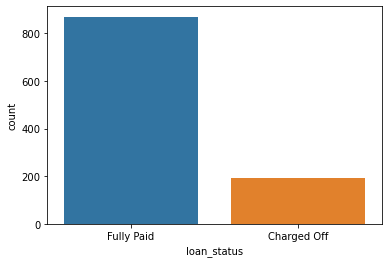

In [60]:
thresh= 40000

print(df[df['credit_revol_bal']>=thresh]['loan_status'].value_counts(normalize=True)*100)
print(df[df['credit_revol_bal']>=thresh]['loan_status'].value_counts())

sns.countplot(df[df['credit_revol_bal']>=thresh]['loan_status'])

**Observations and recommendations**

People with credit revolving balance above 40k have higher default rate of 18.17%. There are high risk persons

**Percent credit card use**

Fully Paid     74.846626
Charged Off    25.153374
Name: loan_status, dtype: float64


C:\Users\I568508\Anaconda3\envs\SUM\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

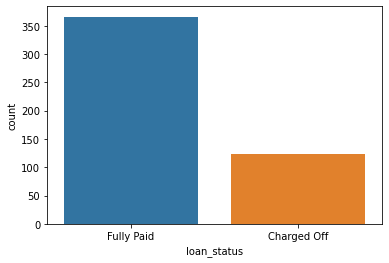

In [61]:
print(df[df['percent_cred_use']>=98]['loan_status'].value_counts(normalize=True)*100)

sns.countplot(df[df['percent_cred_use']>=98]['loan_status'])

**Observartion and recommendations**

People with heavy perecent_cred_use seem to have more default percent. For percent_cred_utlization over 98%, more than 25% customers have defaulted. So high percent credit use customers are credit risk.

**Open credit lines**

In [62]:
thresh= 30

print(df[df['no_of_open_credit_lines']>=thresh]['loan_status'].value_counts())
print(df[df['no_of_open_credit_lines']>=thresh]['loan_status'].value_counts(normalize=True)*100)

Fully Paid     31
Charged Off    10
Name: loan_status, dtype: int64
Fully Paid     75.609756
Charged Off    24.390244
Name: loan_status, dtype: float64


**Observartion and recommendations**

People with credit lines above 30 seem to have high default rate of 25%. People with open credit lines more than 30 should be avoided.

Fully Paid     0.774462
Charged Off    0.225538
Name: loan_status, dtype: float64


C:\Users\I568508\Anaconda3\envs\SUM\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

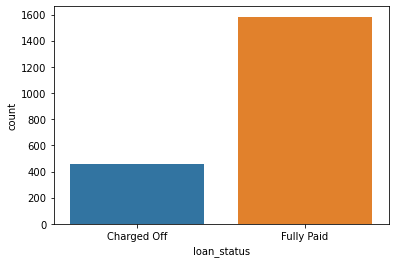

In [63]:
public_record_df= df[df['no_of_pub_records']>0]
print(public_record_df['loan_status'].value_counts(normalize=True))
sns.countplot(public_record_df['loan_status'])

**Observartion and Recommendation**

People with public records seem to have high default rate of 22.5%. They can be avoided as loan applicants

**Public record bankruptcies**

In [64]:
print(df[(df['no_of_pub_record_bankruptcies'].notna()) & (df['no_of_pub_record_bankruptcies']!=0)]['loan_status'].value_counts(normalize=True))
print(df[(df['no_of_pub_record_bankruptcies'].notna()) & (df['no_of_pub_record_bankruptcies']!=0)]['loan_status'].value_counts())

Fully Paid     0.774631
Charged Off    0.225369
Name: loan_status, dtype: float64
Fully Paid     1258
Charged Off     366
Name: loan_status, dtype: int64


**Observation and conclusion:**

22.5% People with public record bankruptcies default out of 1258 people. Hence this is high risk category. 

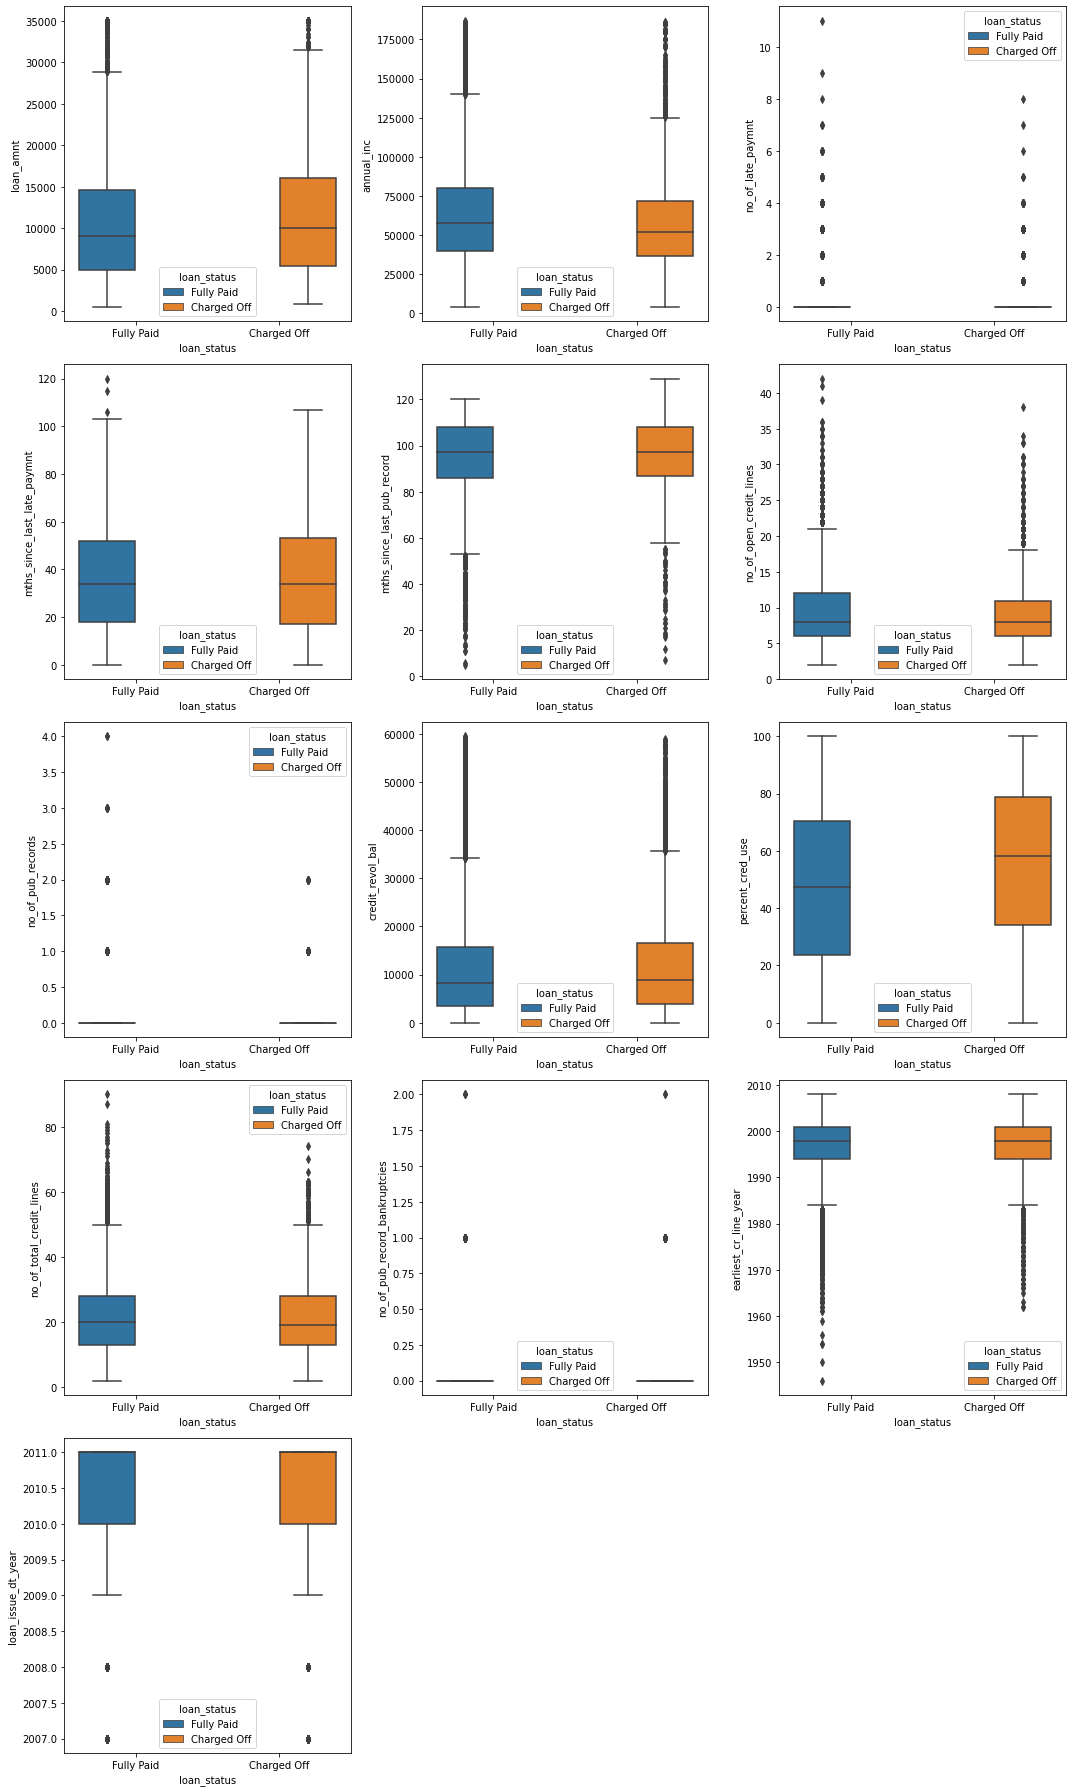

In [65]:
cols = 3
rows = 5
num_cols = df.select_dtypes(exclude='object').columns
fig = plt.figure(figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.boxplot(x =df['loan_status'], y= df[col], ax = ax, hue=df['loan_status'])
    
fig.tight_layout()  
plt.show()

**Obseravtions and conclusions:**

Fully paid and charged off people have almost similar across all numerical categories except percent credit use where charged off people seem to have more percent credit use than the others.

## Categorical feature univariate analysis

In [66]:
df.describe(include='object')

,employment_length,home_ownership,salary_verified,loan_status,loan_purpose,zip_code,address_state
count,36040,37046,37046,37046,37046,37046,37046
unique,11,5,3,2,14,819,50
top,10+ years,RENT,Not Verified,Fully Paid,debt_consolidation,100xx,CA
freq,7927,18244,16300,31596,17430,531,6658


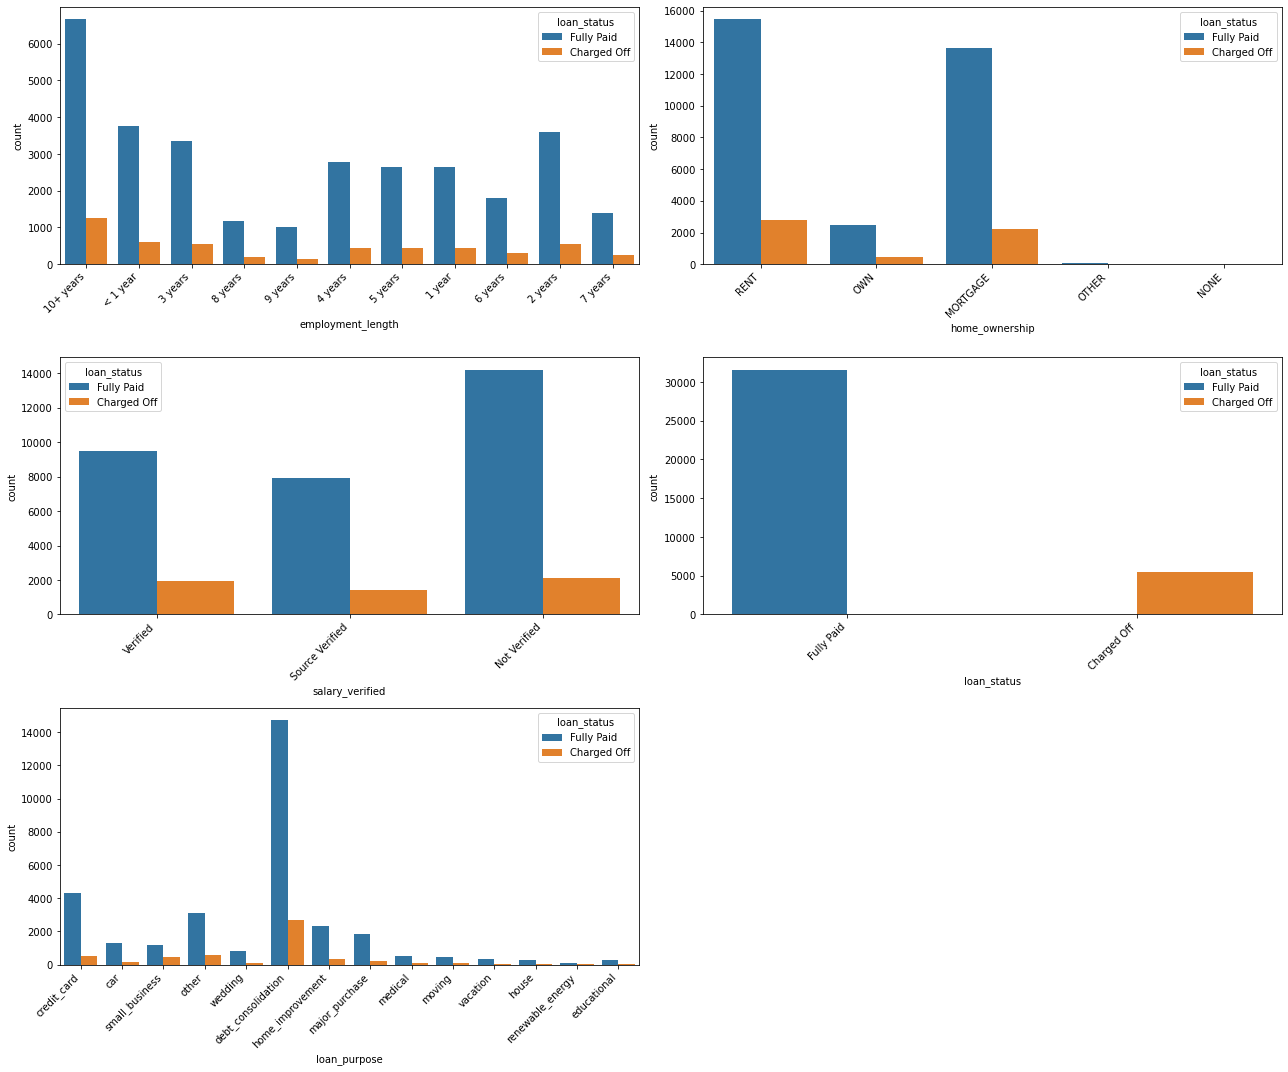

In [75]:
cols = 2
rows = 3
fig = plt.figure(figsize= (18,15))
all_cats = df.select_dtypes(include='object')
cat_cols = all_cats.columns[all_cats.nunique() < 50]
for i, col in enumerate(cat_cols):
    
    ax=fig.add_subplot(rows, cols, i+1)
    
    sns.countplot(x=df[col], ax=ax, hue=df['loan_status'])
    
    plt.xticks(rotation=45, ha='right')
    
fig.tight_layout()  
plt.show()

**Observations and conclusions**

- People take loan for debt_consolidation maximum times.
- Small business loans default at high percentage,

In [110]:
for purpose in list(df['loan_purpose'].unique()):
    print("Loan purpose: ", purpose)
    print(df[df['loan_purpose']==purpose]['loan_status'].value_counts(normalize=True), "\n")

Loan purpose:  credit_card
Fully Paid     0.891594
Charged Off    0.108406
Name: loan_status, dtype: float64 

Loan purpose:  car
Fully Paid     0.890345
Charged Off    0.109655
Name: loan_status, dtype: float64 

Loan purpose:  small_business
Fully Paid     0.723068
Charged Off    0.276932
Name: loan_status, dtype: float64 

Loan purpose:  other
Fully Paid     0.837141
Charged Off    0.162859
Name: loan_status, dtype: float64 

Loan purpose:  wedding
Fully Paid     0.896896
Charged Off    0.103104
Name: loan_status, dtype: float64 

Loan purpose:  debt_consolidation
Fully Paid     0.845554
Charged Off    0.154446
Name: loan_status, dtype: float64 

Loan purpose:  home_improvement
Fully Paid     0.876917
Charged Off    0.123083
Name: loan_status, dtype: float64 

Loan purpose:  major_purchase
Fully Paid     0.89461
Charged Off    0.10539
Name: loan_status, dtype: float64 

Loan purpose:  medical
Fully Paid     0.83871
Charged Off    0.16129
Name: loan_status, dtype: float64 

Loan purp

**Observations and conclustions:**

- Loans for small businesses are of the highest risk with 27.7% people defaulting.
- People default very less for credit card, car and wedding. These seem to be safe loans.

In [117]:
for ownership in list(df['home_ownership'].unique()):
    print("Salary verified? : ", ownership)
    print(df[df['home_ownership']==ownership]['loan_status'].value_counts())
    print(df[df['home_ownership']==ownership]['loan_status'].value_counts(normalize=True), "\n")

Salary verified? :  RENT
Fully Paid     15445
Charged Off     2799
Name: loan_status, dtype: int64
Fully Paid     0.84658
Charged Off    0.15342
Name: loan_status, dtype: float64 

Salary verified? :  OWN
Fully Paid     2445
Charged Off     430
Name: loan_status, dtype: int64
Fully Paid     0.850435
Charged Off    0.149565
Name: loan_status, dtype: float64 

Salary verified? :  MORTGAGE
Fully Paid     13625
Charged Off     2204
Name: loan_status, dtype: int64
Fully Paid     0.860762
Charged Off    0.139238
Name: loan_status, dtype: float64 

Salary verified? :  OTHER
Fully Paid     78
Charged Off    17
Name: loan_status, dtype: int64
Fully Paid     0.821053
Charged Off    0.178947
Name: loan_status, dtype: float64 

Salary verified? :  NONE
Fully Paid    3
Name: loan_status, dtype: int64
Fully Paid    1.0
Name: loan_status, dtype: float64 



**Observation and conclusion**

- No significant difference based on Salary verified. 

# Bivariate analysis

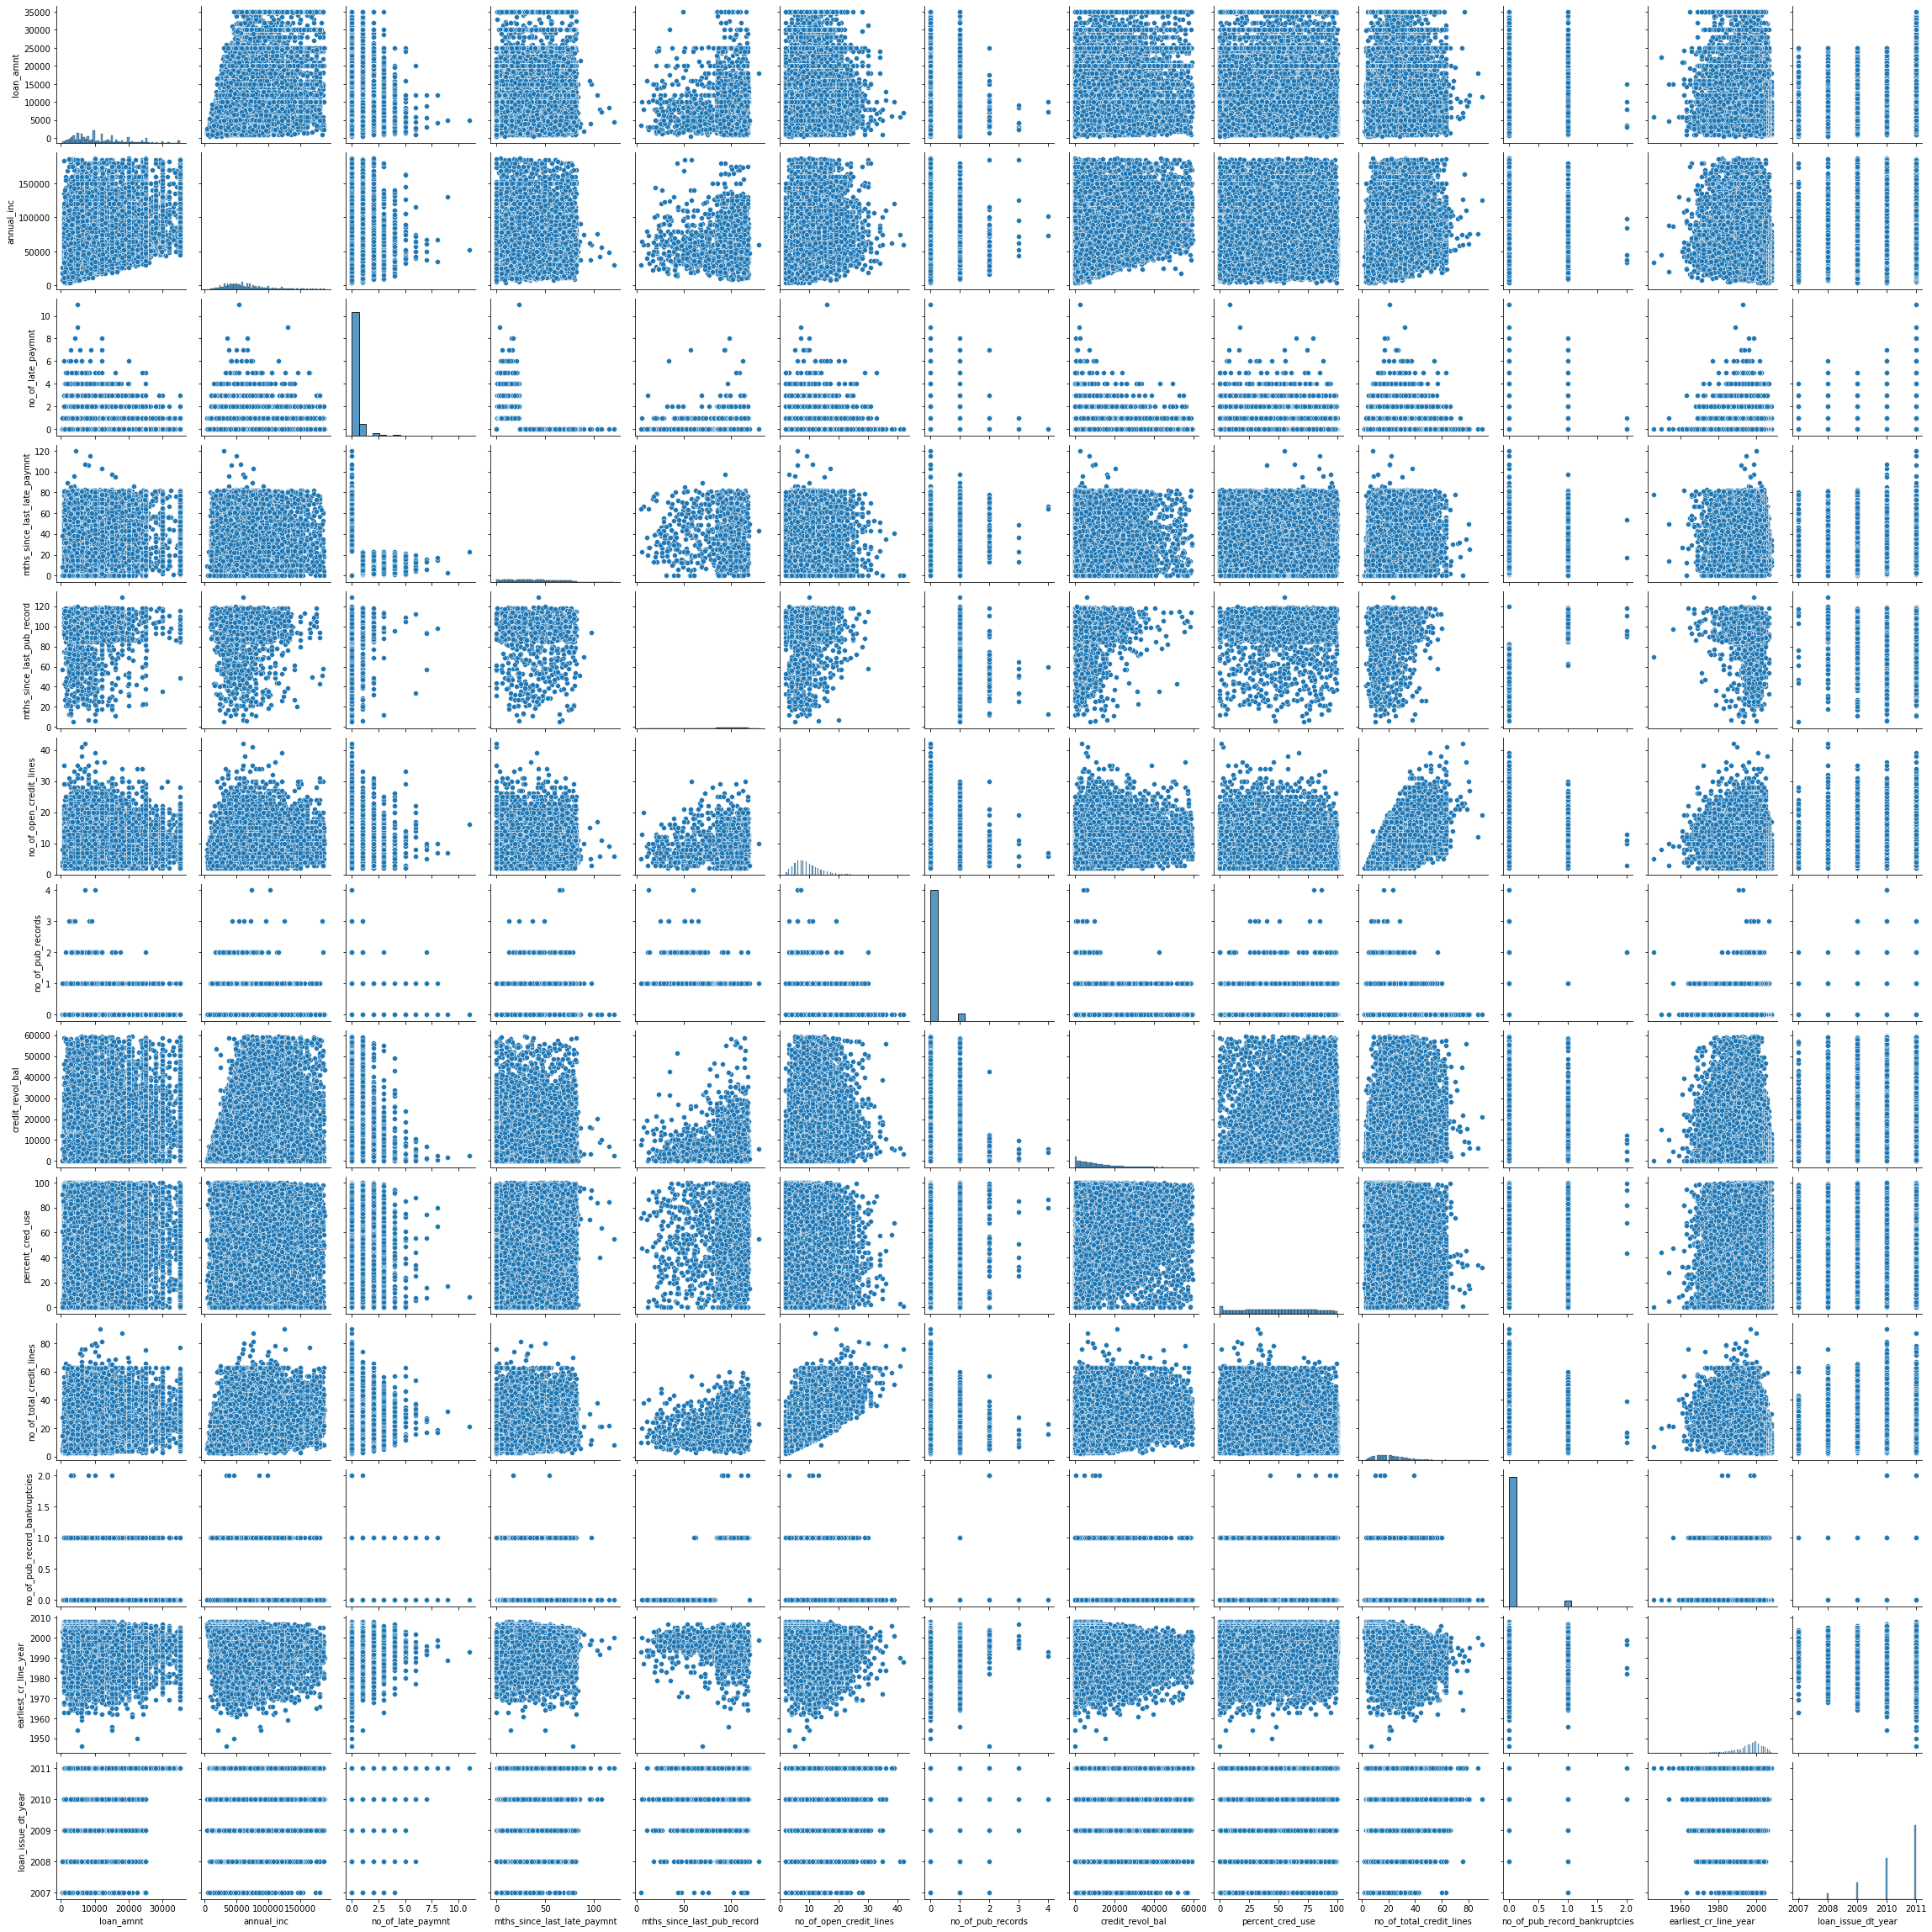

<AxesSubplot:>

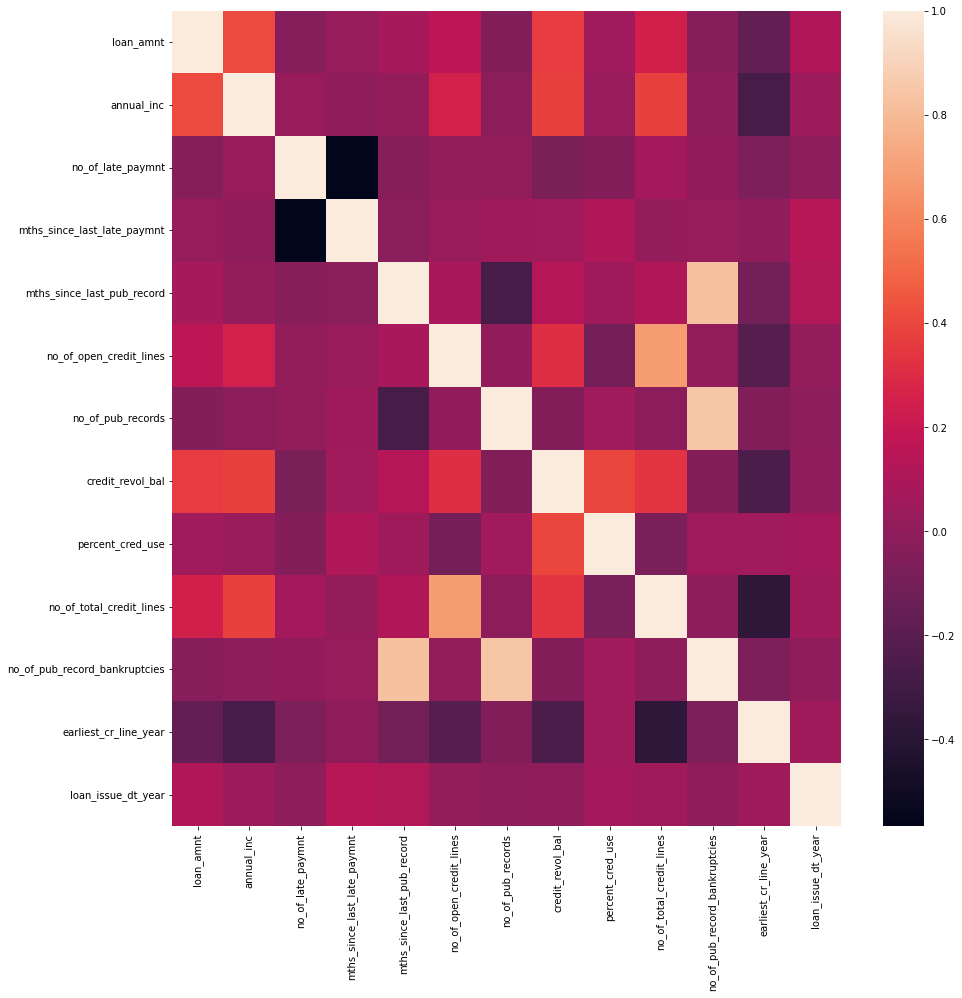

In [146]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())

# Derived metrics analysis